# Business decisions

We have a list of hypotheses written for a large online company. Our aim is to increase the revenue. We would prioritize the hypotheses, test it and give results accordingly.

### Table of Contents

* [EDA](#chapter1)
    * [EDA - hypotheses](#section_1_1)
    * [EDA - orders](#section_1_2)
    * [RDA - visits](#section_1_3)
* [ICE and RICE](#chapter2)
    * [ICE](#section_2_1)
    * [RICE](#section_2_2)
    * [Compering the results](#section_2_3)
* [A/B test](#chapter3)
    * [Camulative revenue](#section_3_1)
    * [Camulative order size](#section_3_2) 
    * [Relative difference in camuletive order size](#section_3_3) 
    * [Conversion](#section_3_4) 
    * [Number of orders per user - scatter chart](#section_3_5) 
    * [Number of orders percentile](#section_3_6) 
    * [Order price per user- scatter chart](#section_3_7) 
    * [Order price percentile](#section_3_8) 
    * [Conversion difference- raw data](#section_3_9) 
    * [difference in order size - raw data](#section_3_10) 
    * [Conversion difference- filtered data](#section_3_11) 
    * [difference in order size - foltered data](#section_3_12)  
* [Results](#chapter4)   

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import math as mth
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Exploratory data analysis <a class="anchor" id="chapter1"></a>

## EDA hypotheses data <a class="anchor" id="section_1_2"></a>

In [2]:
pd.set_option('display.max_colwidth', -1)
hypo = pd.read_csv('hypotheses_us.csv', sep=';')
hypo


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [3]:
hypo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hypo.columns = map(str.lower, hypo.columns)

Hypo table with the hypotheses we will test and the parameters that will help prioritize the hypotheses.

reach - number of people touches
impact - number of people will effect
confidence - How successful the hypothesis will be
effort - Investment of resources and money

## EDA orders data <a class="anchor" id="section_1_2"></a>

In [5]:
orders = pd.read_csv('orders_us.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [6]:
orders.tail()

,transactionId,visitorId,date,revenue,group
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A
1196,3936777065,2108080724,2019-08-15,3120.1,B


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [8]:
orders.shape

(1197, 5)

In [9]:
orders.describe(include='all')

,transactionId,visitorId,date,revenue,group
count,1.197000e+03,1.197000e+03,1197,1197.000000,1197
unique,NaN,NaN,31,NaN,2
top,NaN,NaN,2019-08-05,NaN,B
freq,NaN,NaN,48,NaN,640
mean,2.155621e+09,2.165960e+09,NaN,131.491646,NaN
std,1.229085e+09,1.236014e+09,NaN,603.004729,NaN
min,1.062393e+06,5.114589e+06,NaN,5.000000,NaN
25%,1.166776e+09,1.111826e+09,NaN,20.800000,NaN
50%,2.145194e+09,2.217985e+09,NaN,50.200000,NaN
75%,3.237740e+09,3.177606e+09,NaN,130.400000,NaN


Text(0, 0.5, 'distribution')

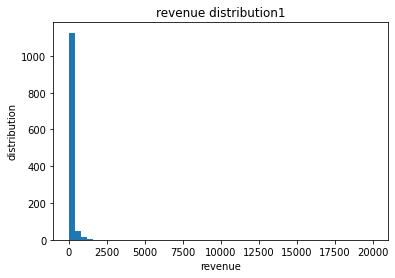

In [10]:
plt.hist(orders['revenue'], bins=50, range=(0,20000))
plt.title('revenue distribution1')
plt.xlabel('revenue')
plt.ylabel('distribution')

Text(0, 0.5, 'distribution')

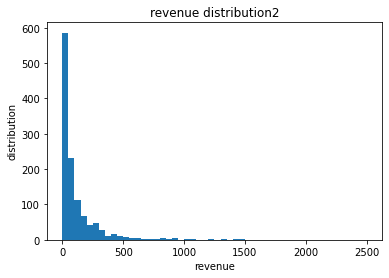

In [11]:
plt.hist(orders['revenue'], bins=50, range=(0,2500))
plt.title('revenue distribution2')
plt.xlabel('revenue')
plt.ylabel('distribution')

In [12]:
orders.duplicated().sum()

0

In [13]:
orders['date'].sort_values().unique()

array(['2019-08-01', '2019-08-02', '2019-08-03', '2019-08-04',
       '2019-08-05', '2019-08-06', '2019-08-07', '2019-08-08',
       '2019-08-09', '2019-08-10', '2019-08-11', '2019-08-12',
       '2019-08-13', '2019-08-14', '2019-08-15', '2019-08-16',
       '2019-08-17', '2019-08-18', '2019-08-19', '2019-08-20',
       '2019-08-21', '2019-08-22', '2019-08-23', '2019-08-24',
       '2019-08-25', '2019-08-26', '2019-08-27', '2019-08-28',
       '2019-08-29', '2019-08-30', '2019-08-31'], dtype=object)

* Orders Table displays Information on orders placed in August 2019. 
* There do not appear to be any duplicates. 
* No missing values.
* It seems that there may be outliers in the income column after the value 500. We see that the mean and the median are very different. The graph deviates to the right.

## EDA visits data <a class="anchor" id="section_1_3"></a>

In [14]:
visits = pd.read_csv('visits_us.csv')
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [15]:
visits.tail()

,date,group,visits
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718


In [16]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [17]:
visits.shape

(62, 3)

In [18]:
visits.describe()

,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [19]:
visits['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

In [20]:
visits['date'].value_counts()

2019-08-03    2
2019-08-31    2
2019-08-08    2
2019-08-27    2
2019-08-09    2
2019-08-20    2
2019-08-26    2
2019-08-28    2
2019-08-01    2
2019-08-25    2
2019-08-15    2
2019-08-10    2
2019-08-24    2
2019-08-22    2
2019-08-11    2
2019-08-02    2
2019-08-23    2
2019-08-04    2
2019-08-21    2
2019-08-29    2
2019-08-16    2
2019-08-06    2
2019-08-18    2
2019-08-07    2
2019-08-19    2
2019-08-13    2
2019-08-30    2
2019-08-14    2
2019-08-05    2
2019-08-17    2
2019-08-12    2
Name: date, dtype: int64

In [21]:
visits['date'].sort_values().unique()

array(['2019-08-01', '2019-08-02', '2019-08-03', '2019-08-04',
       '2019-08-05', '2019-08-06', '2019-08-07', '2019-08-08',
       '2019-08-09', '2019-08-10', '2019-08-11', '2019-08-12',
       '2019-08-13', '2019-08-14', '2019-08-15', '2019-08-16',
       '2019-08-17', '2019-08-18', '2019-08-19', '2019-08-20',
       '2019-08-21', '2019-08-22', '2019-08-23', '2019-08-24',
       '2019-08-25', '2019-08-26', '2019-08-27', '2019-08-28',
       '2019-08-29', '2019-08-30', '2019-08-31'], dtype=object)

In [22]:
visits.duplicated().sum()

0

* We have information reviewed in August 2019 (31 days) on both groups A and B. 
* The data is about number of visits per day for each group. 
* It seems that the minimum amount of visits per day was 361 and the maximum amount is 770. The average and median are similar. 
* No duplicates
* NO null values

# Part 1 -  Prioritizing Hypotheses <a class="anchor" id="section_2"></a>

## ICE <a class="anchor" id="section_2_1"></a>

In [23]:
hypo.head()

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1


In [24]:
# ICE = impact * confidence / effort

hypo['ICE'] = hypo['impact'] * hypo['confidence'] / hypo['effort']

print(hypo[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                                                                                               hypothesis  \
8  Launch a promotion that gives users discounts on their birthdays                                                         
0  Add two new channels for attracting traffic. This will bring 30% more users                                              
7  Add a subscription form to all the main pages. This will help you compile a mailing list                                 
6  Show banners with current offers and sales on the main page. This will boost conversion                                  
2  Add product recommendation blocks to the store's site. This will increase conversion and average purchase size           
1  Launch your own delivery service. This will shorten delivery time                                                        
5  Add a customer review page. This will increase the number of orders                                                      


## RICE <a class="anchor" id="section_2_2"></a>

In [25]:
#RICE = reach * impact * confidence / effort

hypo['RICE'] = hypo['reach'] * hypo['impact'] * hypo['confidence'] / hypo['effort']

print(hypo[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                                                                                               hypothesis  \
7  Add a subscription form to all the main pages. This will help you compile a mailing list                                 
2  Add product recommendation blocks to the store's site. This will increase conversion and average purchase size           
0  Add two new channels for attracting traffic. This will bring 30% more users                                              
6  Show banners with current offers and sales on the main page. This will boost conversion                                  
8  Launch a promotion that gives users discounts on their birthdays                                                         
3  Change the category structure. This will increase conversion since users will find the products they want more quickly   
1  Launch your own delivery service. This will shorten delivery time                                                        


## compering RICE and ICE  <a class="anchor" id="section_2_3"></a>

Text(0, 0.5, 'rank')

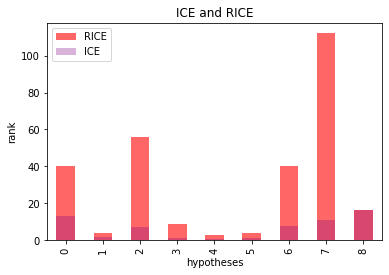

In [26]:
hypo['RICE'].plot(kind='bar', color='red', alpha=0.6)
hypo['ICE'].plot(kind='bar', color='purple', alpha=0.3)
plt.title('ICE and RICE')
plt.legend()
plt.xlabel('hypotheses')
plt.ylabel('rank')

ICE and RICE are two ways to prioritize hypotheses according to criteria: influence, confidence, effort and reach. With ICE we basically compute a relationship between influence and confidence versus economic cost. With RICE we in addition add the criterion of the amount of customers that will be part of the change for confidence and impact. All that again versus economic cost. 

There is a difference between the results of ICE and RICE, probably the hypotheses 7 and 2 have a larger amount of customers who will use the system(reach) so it boost the result.

# Part 2. A/B Test Analysis <a class="anchor" id="section_3"></a>

## 1. camulative revenue by group <a class="anchor" id="section_3_1"></a>

In [27]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [28]:
visits

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [29]:
# building an array with unique paired date-group values
datesGroups = orders[['date','group']].drop_duplicates()

# getting aggregated cumulative daily data on orders 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# getting aggregated cumulative daily data on visitors  
visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

# merging the two tables into one and giving its columns descriptive names
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head()) 

         date group  orders  buyers  revenue  visitors
0  2019-08-01  A     24      20      2356.8   719     
1  2019-08-01  B     21      20      1620.0   713     
2  2019-08-02  A     44      38      3860.3   1338    
3  2019-08-02  B     45      43      4243.8   1294    
4  2019-08-03  A     68      62      5675.5   1845    


Text(0.5, 1.0, 'cumulative revenue')

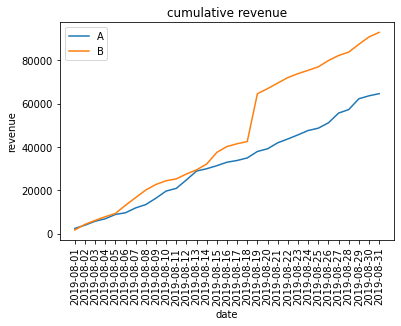

In [30]:

# DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Plotting the group A revenue graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 
plt.xticks(rotation='vertical')
plt.xlabel('date')
plt.ylabel('revenue')
plt.title('cumulative revenue')


The two groups began at the same point. As the days go by, the revenue of goup B is getting bigger.

In [31]:
orders[orders['revenue']>1000]

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,19920.4,B
662,1811671147,4266935830,2019-08-29,1220.2,A
682,1216533772,4266935830,2019-08-29,1220.2,B
743,3603576309,4133034833,2019-08-09,1050.0,A
744,3668308183,888512513,2019-08-27,1335.6,B
858,192721366,1316129916,2019-08-27,1450.2,A
1099,316924019,148427295,2019-08-12,1015.9,A
1103,1348774318,1164614297,2019-08-12,1025.8,A
1136,666610489,1307669133,2019-08-13,1425.8,A
1196,3936777065,2108080724,2019-08-15,3120.1,B


## 2. camulative average order size by group <a class="anchor" id="section_3_2"></a>

Text(0, 0.5, 'order size')

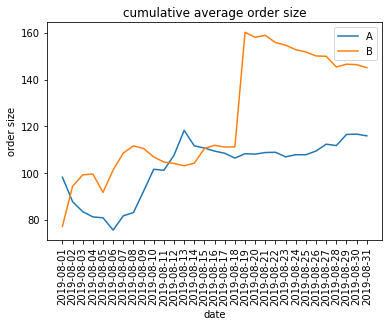

In [32]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.xticks(rotation='vertical')
plt.title('cumulative average order size')
plt.xlabel('date')
plt.ylabel('order size')

The camulative order size is bigger in B group than A group. We see places with picks, probably a large purchase

## 3. relative difference in camulative average order size by groups <a class="anchor" id="section_3_3"></a>

Text(0, 0.5, 'relative difference in order size')

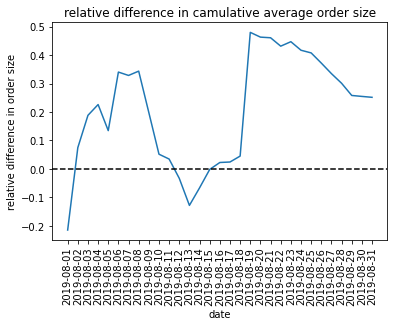

In [33]:
# gathering the data into one DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# plotting a relative difference graph for the average purchase sizes
(
    plt.plot(mergedCumulativeRevenue['date'], 
             (mergedCumulativeRevenue['revenueB']/
              mergedCumulativeRevenue['ordersB'])/
             (mergedCumulativeRevenue['revenueA']/
              mergedCumulativeRevenue['ordersA'])-1)
)

# adding the X axis
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation='vertical')
plt.title('relative difference in camulative average order size')
plt.xlabel('date')
plt.ylabel('relative difference in order size')

Most of the time the order size of B is bigger that A .

##  4. conversion rate for each day <a class="anchor" id="section_3_4"></a>

Text(0, 0.5, 'convesion')

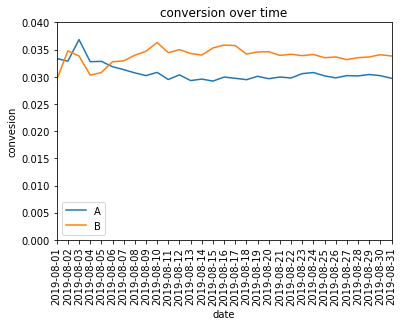

In [34]:
# calculating cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# plotting the graphs
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# setting the axes' scale
plt.axis(["2019-08-01", '2019-08-31', 0, 0.04]) 
plt.xticks(rotation='vertical')
plt.title('conversion over time')
plt.xlabel('date')
plt.ylabel('convesion')

The comulative conversion of B group is bigger. Both groups have a stable coversion over time 

Text(0, 0.5, 'relative conversion')

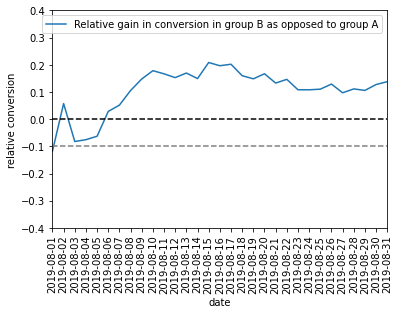

In [35]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(
    mergedCumulativeConversions['date'], 
    mergedCumulativeConversions['conversionB']/
    mergedCumulativeConversions['conversionA']-1, 
    label="Relative gain in conversion in group B as opposed to group A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.4, 0.4]) 
plt.xticks(rotation='vertical')
plt.xlabel('date')
plt.ylabel('relative conversion')

We ask to see the relative ratio of Group B versus Group A in the cumulative conversion over time. The conversion of group B is bigger, after it get stableized

## 5. orders per user <a class="anchor" id="section_3_5"></a>

In [36]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [37]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId' : pd.Series.nunique})
)

ordersByUsers.columns = ['userId','orders']

print(ordersByUsers.sort_values(by='orders',ascending=False).head(10)) 

          userId  orders
1023  4256040402  11    
591   2458001652  11    
569   2378935119  9     
487   2038680547  8     
44    199603092   5     
744   3062433592  5     
55    237748145   5     
917   3803269165  5     
299   1230306981  5     
897   3717692402  5     


Text(0, 0.5, 'orders')

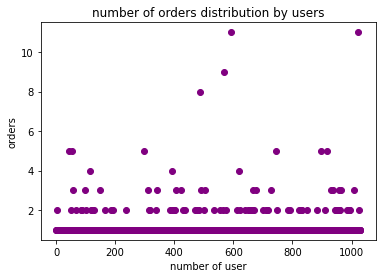

In [38]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'], c='purple')
plt.title('number of orders distribution by users')
plt.xlabel('number of user')
plt.ylabel('orders') 

Most customers make less than 2 orders. There is a small percentage who make between 2 and 6 orders. A single percent make over 6 orders

## 6. percentiles order per user <a class="anchor" id="section_3_6"></a>

In [39]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


95% of customers make up to 2 orders. This means that only 5% are the exceptions who make over 2 orders

## 7. order price per user  <a class="anchor" id="section_3_7"></a>

In [40]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [41]:
revenueByUser = (
    orders.drop(['group', 'transactionId', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'revenue' : 'sum'})
)

Text(0, 0.5, 'order price')

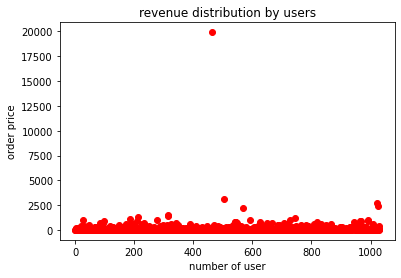

In [42]:
x_values1 = pd.Series(range(0,len(revenueByUser)))

plt.scatter(x_values1, revenueByUser.revenue, c='red')
plt.title('revenue distribution by users')
plt.xlabel('number of user')
plt.ylabel('order price')

In addition to what we saw earlier (the income hist graph), here too it can be seen that most customers did not buy more than 2500. Beyond this amount these are outliers .

In [43]:
revenueByUser

,visitorId,revenue
0,5114589,10.8
1,6958315,25.9
2,8300375,196.2
3,11685486,100.4
4,39475350,65.4
...,...,...
1026,4266935830,2440.4
1027,4278982564,385.7
1028,4279090005,105.3
1029,4281247801,45.6


(0.0, 500.0)

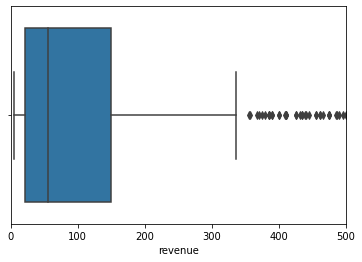

In [44]:
#boxplot
sns.boxplot(revenueByUser.revenue)
plt.xlim(0,500)

<div class="alert alert-info"> <b>Student comment:</b>The boxplot shows outliers begin from 350.</div>


The boxplot shows outliers begin from 350.

##  8. percentiles price per user <a class="anchor" id="section_3_8"></a>

In [45]:
print(np.percentile(revenueByUser['revenue'], [95, 99])) 

[ 510.35 1047.24]


wow, 95% of customers brought income of 510 and 99% of customers brought income of 1047. This means that only one percent of the population are exceptional.

## 9. statistical significance of the difference of order conversion between group A and B- raw data  <a class="anchor" id="section_3_9"></a>

In [46]:
visits

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [47]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [48]:
#two tables with number of orders by user. for each sample group 
ordersByUsersA = (
    orders[orders['group']=='A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId' : pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group']=='B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId' : pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

In [49]:
#combining users who bought and users that didn't. 
sampleA = (
    pd.concat([ordersByUsersA['orders']
               ,pd.Series
               (0, index=np.arange(visits[visits['group']=='A']
                                   ['visits'].sum() - 
                                   len(ordersByUsersA['orders'])), 
                name='orders')],axis=0)
)
sampleB = (
    pd.concat([ordersByUsersB['orders']
               ,pd.Series
               (0, index=np.arange(visits[visits['group']=='B']
                                   ['visits'].sum() - 
                                   len(ordersByUsersB['orders'])), 
                name='orders')],axis=0)
)

To compute the Mann Whitney test we need to have the number of orders for each user.

In [50]:
print("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.008
0.138


* null hypotheses: A group = B group.
  alternative hypotheses: A group != B group

* We computed a Mann Whitney test on a raw data(data without changes)
* We compere the convesion between two groups
* our alpha set to 0.05.
* p_value = 0.008
* p_value < alpha = p-value is smaller than alpha. It means that we can reject the null hypoheses: the samples A and B isn't equal. 
* When compering the samples, the convesion of group B is bigger. 

## 10. statistical significance of the difference in the  average order size between two groups <a class="anchor" id="section_3_10"></a>

In [51]:
#null hypotheses: group A = group B
#alternative hypotheses: group A != group B
print("{0:.3f}".format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.346
0.252


* null hypotheses: A group = B group. alternative hypotheses: A group != B group
* We computed a Mann Whitney test on a raw data(data without changes)
* We compere the average order size between two groups
* our alpha set to 0.05.
* p-value = 0.346
* p-value > alpha => p-value is bigger than alpha. It means that we can't reject the null hypoheses-we can't say that there is significant difference between the groups
* When compering the orders size average of each sample, the order size of group A is smaller than B group.
* The slightly contradictory results, lead us to do a test for filtered data .

## 11. statistical significance of the difference in conversion between the groups using the filtered data.  <a class="anchor" id="section_3_11"></a>

Text(0.5, 0, 'revenue')

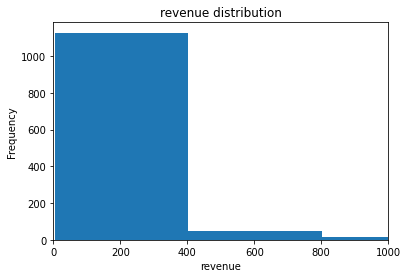

In [52]:
orders['revenue'].plot(kind='hist', bins=50, xlim=(0, 1000))
plt.title('revenue distribution')
plt.xlabel('revenue')

In [53]:
#finding anomalous users
usersWithManyOrders = (
    pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], 
               ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], 
              axis = 0)
)
usersWithExpensiveOrders = orders[orders['revenue'] > 500]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
(61,)


In [54]:
#statistical significance calculation
sampleAFiltered = (
    pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId']
                                             .isin(abnormalUsers))]['orders'],
               pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits']
                                            .sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
)

sampleBFiltered = (
    pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId']
                                             .isin(abnormalUsers))]['orders'],
               pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits']
                                            .sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)
)

print("{0:.3f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.005
0.179


* We computed a Mann Whitney test on a filtered data(data without users with anomalous values of number of orders and revenue)
* To do so we first we made a sliced data with anomalous users. We know that the 95th percentile of number of orders is 2 orders and the revenue per user is 510 (round to 500). We want to use the 5% so we use this information in our data slice.
* There are 60 anomalous users found

* When compering the convesion between two groups :
our alpha set to 0.05.
p_value = 0.006 (in the raw data it was 0.008)
p_value < alpha = p-value is still smaller than alpha. It means that we can reject the null hypoheses: the samples A and B isn't equal in thier conversion rate.
When compering the samples, the conversion of group B is bigger.

## 12. statistical significance of the difference in order size between the groups using the filtered data  <a class="anchor" id="section_3_12"></a>

In [55]:
#computing Mann whitnet test on data withot the anomalous on each group
print("{0:.3f}".format(st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',
                          np.logical_not(orders['visitorId']
                                         .isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

0.455
0.011


* We computed a Mann Whitney test on a filtered data
* We compere the average order size between two groups
* our alpha set to 0.05.
* p-value = 0.432. p-value > alpha => p-value is bigger than alpha. It means that we can't reject the null hypoheses: the samples A and B is similar on their average order size.
* The order size mean of group B is bigger. The difference between the groups is only 0.1%


# Results <a class="anchor" id="chapter4"></a>

what we found:
* convesion:
* raw data
p-value: 0.008
difference: 0.138
B>A
* filtered data:
p-value: 0.006
difference: 0.176
B>A

* orders size:
* raw data
p-value: 0.346
difference: 0.252
* filtered data:
p-value: 0.432
difference: 0.001

Either raw and filtered data revealed statistically significant differences in conversion between the groups. In addition, The graph we plotted earlier about the conversion ratio between the groups, also shows that group B leads over A.

When compering average order size, neither raw nor filtered data revealed any significant differences. The difference in average order size is only 0.1% (filtered data). 

I will recomend to stop the test. We see over time that Group B leads in testing. Even after we cleaned up the data, in terms of conversion rate Group B led. Although we see that in terms of average transaction it is not possible to say that there is a statistical significance between groups, even after we cleaned the data, in my opinion there is no need to continue with the test.
